In [ ]:
exec(open("init_notebook.py").read())
%load_ext autoreload
%autoreload 2

In [2]:
from sim.LoopSimulator import LoopSimulator
from model.Sender import Sender
from model.Path import Path
from model.SimpleQueuePath import SimpleQueuePath
from model.NoobSender import NoobSender
from model.TTLObserverSender import TTLObserverSender
import pprint
import logging
logging.basicConfig(level=logging.INFO)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [26]:
path = SimpleQueuePath(avgTTL=20, noiseMax=20, maxDataInPipe=12, maxQsize=10000, debug=False)
simulator = LoopSimulator(path, printStatFreq=20)
deliveryRate = 5
# sender = NoobSender(simulator.createSenderId(), deliveryRate, debug=False)
sender = TTLObserverSender(simulator.createSenderId(), deliveryRate, debug=True)
simulator.senders[sender.id] = sender
simulator.run(1000)


INFO:root:
************Time step: 20*********
INFO:root:Packets in-flight: 68
INFO:root:Data in-flight: 1.36KB
INFO:root:packetsInQueue: 0
INFO:root:
************Time step: 40*********
INFO:root:TTLObserverSender:stepUpDeliveryRate avgTTLwindow 24.8
INFO:root:TTLObserverSender:stepUpDeliveryRate 8.064516129032258
INFO:root:Packets in-flight: 102
INFO:root:Data in-flight: 2.04KB
INFO:root:packetsInQueue: 0
INFO:root:
************Time step: 60*********
INFO:root:Packets in-flight: 146
INFO:root:Data in-flight: 2.92KB
INFO:root:packetsInQueue: 0
INFO:root:
************Time step: 80*********
INFO:root:TTLObserverSender:stepUpDeliveryRate avgTTLwindow 25.6
INFO:root:TTLObserverSender:stepUpDeliveryRate 12.600806451612904
INFO:root:Packets in-flight: 181
INFO:root:Data in-flight: 3.62KB
INFO:root:packetsInQueue: 0
INFO:root:
************Time step: 100*********
INFO:root:Packets in-flight: 252
INFO:root:Data in-flight: 5.04KB
INFO:root:packetsInQueue: 0
INFO:root:
************Time step: 120**

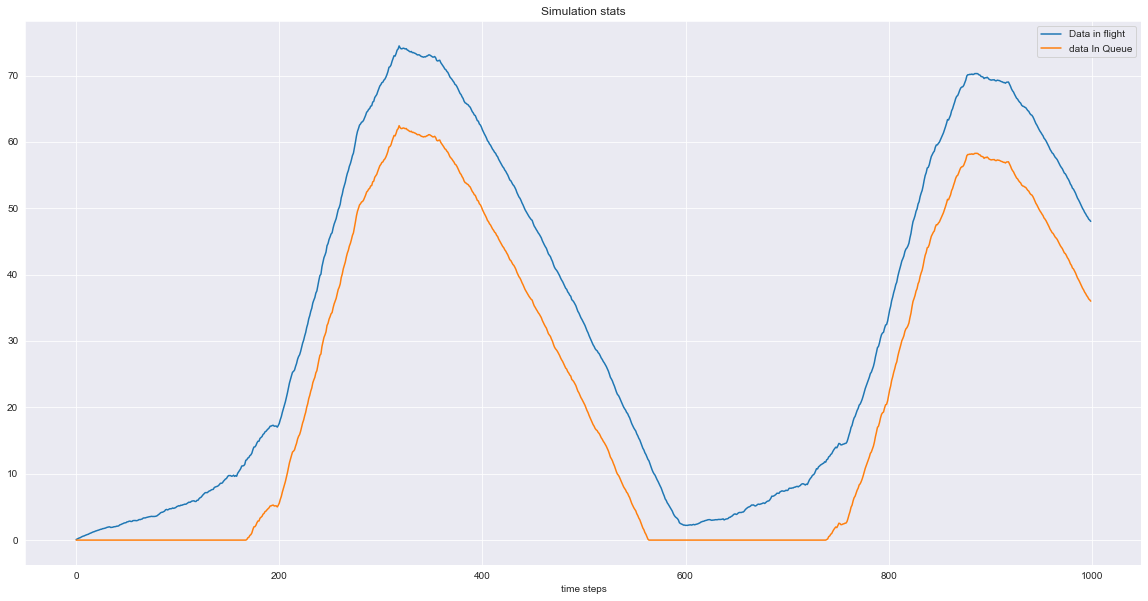

In [28]:
plt.figure(figsize=(20,10))
plt.plot(simulator.stats['dataInFlight'], label="Data in flight")
plt.plot(simulator.stats['dataInQueue'], label="data In Queue")
# plt.plot(simulator.stats['packetsInFlight'], label="Packet in flight")
# plt.plot(simulator.stats['packetsInQueue'], label="packets In Queue")
# plt.plot(simulator.stats['packetsSent'], label="Packets Sent")
# plt.plot(simulator.stats['packetsAcked'], label="Packet Acked")
# plt.plot(simulator.stats['totalPacketsSent'], label="Total packets Sent")
# plt.plot(simulator.stats['totalPacketsAcked'], label="Total packet Acked")
plt.title("Simulation stats")
plt.xlabel("time steps")
plt.legend()
plt.show()


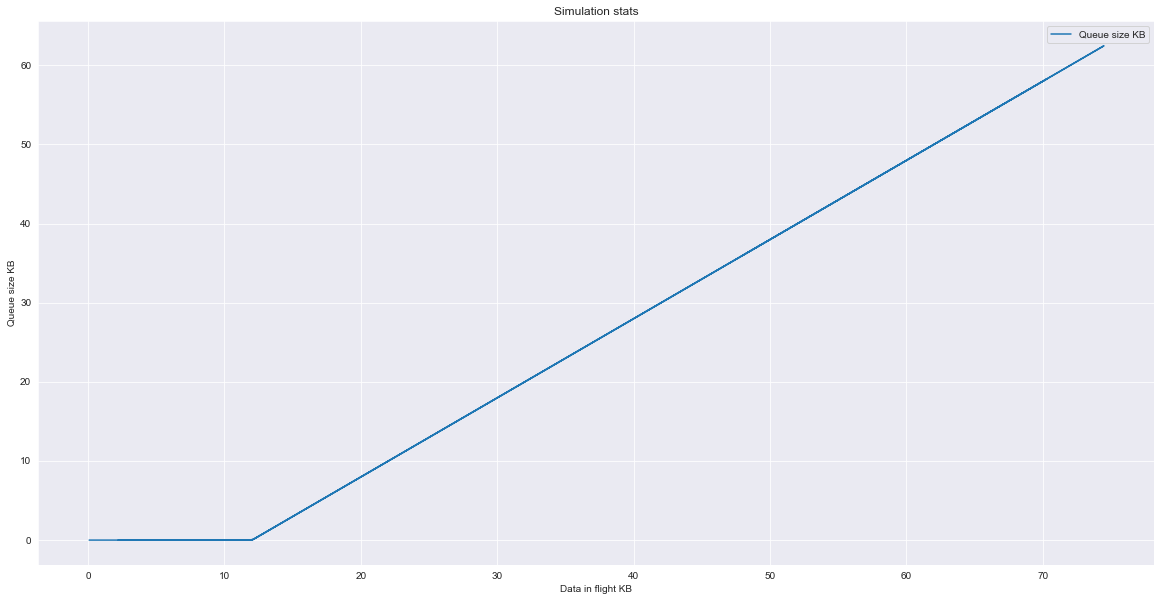

In [29]:
plt.figure(figsize=(20,10))
plt.plot(simulator.stats['dataInFlight'], simulator.stats['dataInQueue'], label="Queue size KB")
plt.title("Simulation stats")
plt.xlabel("Data in flight KB")
plt.ylabel("Queue size KB")
plt.legend()
plt.show()

In [30]:
from sim.AnalyzerTools import AnalyzerTools
analyzerTools = AnalyzerTools()
packetStats = analyzerTools.createDfFromPackets(sender.ackedPackets)

<AxesSubplot:xlabel='ttl', ylabel='Count'>

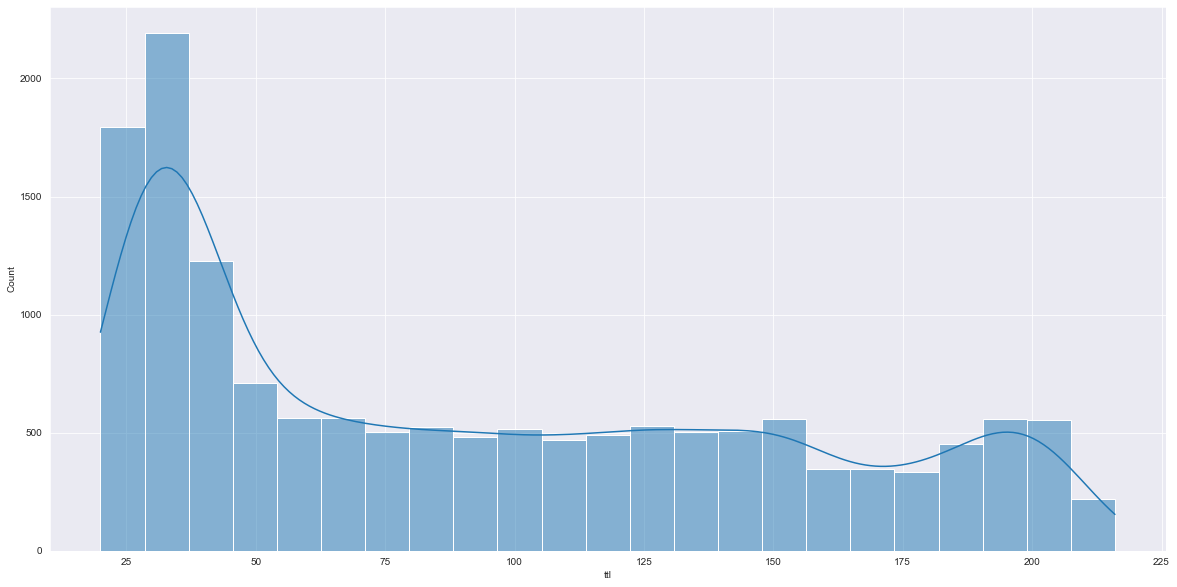

In [31]:

plt.figure(figsize=(20,10))
sns.histplot(packetStats.ttl, kde=True)

In [32]:

# plt.figure(figsize=(20,10))
# sns.lineplot(data = packetStats, x='packNum', y='ttl', color='g')

In [33]:
from sim.AnalyzerTools import AnalyzerTools
analyzerTools = AnalyzerTools()
dfPackets = analyzerTools.createDfFromPackets(sender.ackedPackets)

In [34]:
dfPackets.head()

,packNum,ttl,ttlNoise,sentAt,ackAt,isDropped
0,1,20,0,1,21,False
1,10,20,0,3,23,False
2,100,32,12,29,61,False
3,1000,39,19,134,173,False
4,10000,24,4,699,723,False


In [35]:
print(simulator.stats.keys())
dfStats = analyzerTools.getSenderStatsPerTimeStep(dfPackets, simulator.stats)

dict_keys(['dataInFlight', 'dataInQueue', 'packetsInFlight', 'packetsInQueue', 'packetsSent', 'packetsAcked', 'totalPacketsSent', 'totalPacketsAcked', 'queueSize'])


In [36]:
dfStats.head()

,avgTTL,minTTL,maxTTL,dataInFlight,dataInQueue
sentAt,,,,,
1,30.25,20,39,0.16,0.0
2,28.00,21,38,0.24,0.0
3,24.00,20,29,0.32,0.0
4,27.25,21,31,0.36,0.0
5,28.00,27,29,0.46,0.0


In [37]:
dfStats.tail()

,avgTTL,minTTL,maxTTL,dataInFlight,dataInQueue
sentAt,,,,,
840,154.750000,148,160,56.54,44.52
841,153.750000,151,157,57.20,45.18
842,155.000000,152,158,57.78,45.76
843,154.636364,152,157,58.10,46.08
844,155.285714,154,156,58.40,46.38


<AxesSubplot:xlabel='sentAt'>

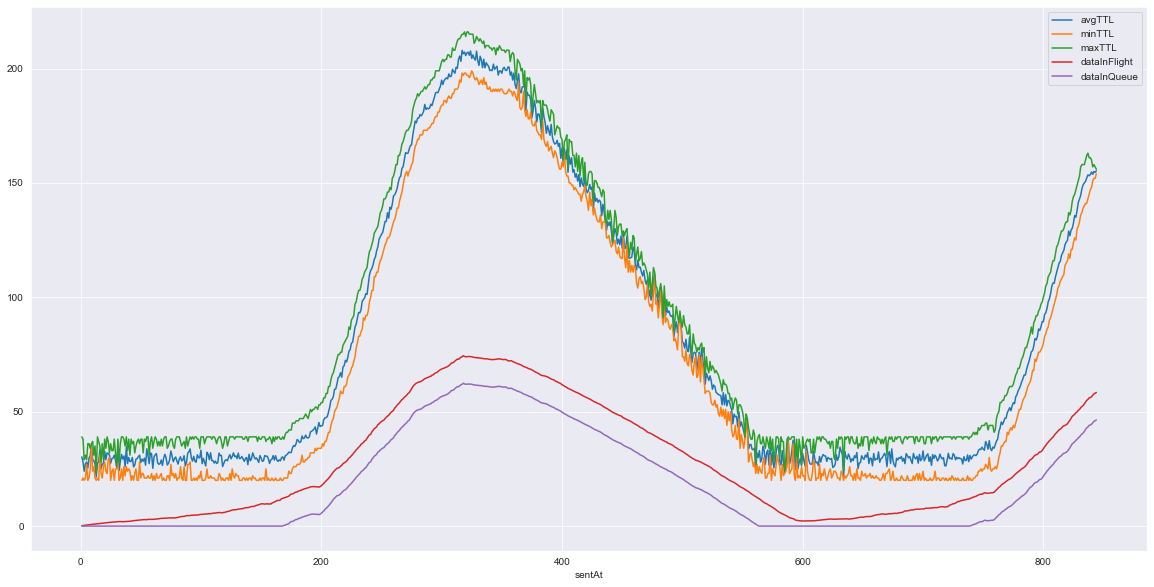

In [38]:
dfStats.plot(figsize=(20,10))

1000
(844,)


<Figure size 1440x720 with 0 Axes>

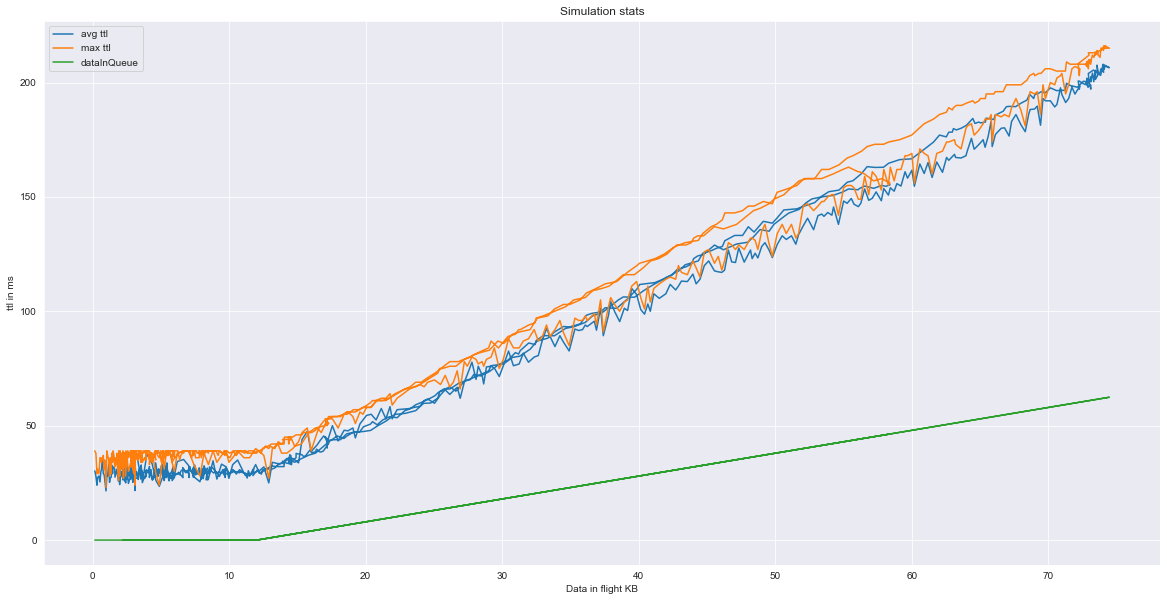

In [39]:
# # data in flight vs others

# plt.figure(figsize=(20,10))
# print( len(simulator.stats['dataInFlight']))
# print( dfStats['avgTTL'].shape)
# # sns.lineplot(data=dfStats, x='dataInFlight')

# plt.figure(figsize=(20,10))
# plt.plot(dfStats['dataInFlight'], dfStats['avgTTL'], label="avg ttl")
# plt.plot(dfStats['dataInFlight'], dfStats['maxTTL'], label="max ttl")
# plt.plot(dfStats['dataInFlight'], dfStats['dataInQueue'], label="dataInQueue")
# plt.title("Simulation stats")
# plt.xlabel("Data in flight KB")
# plt.ylabel("ttl in ms")
# plt.legend()
# plt.show()

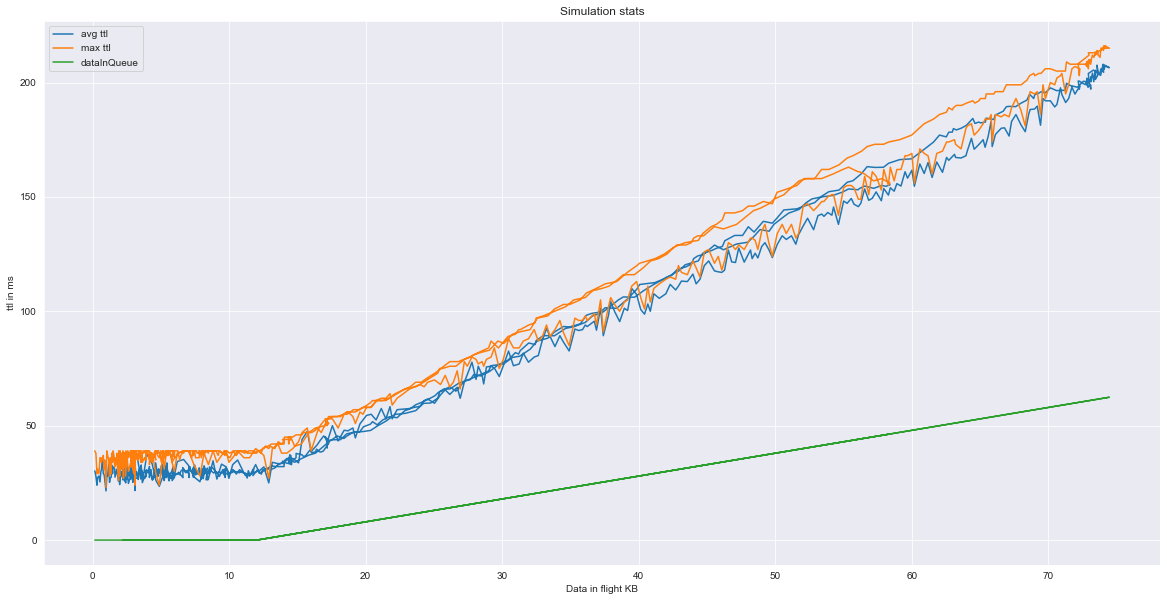

In [41]:
analyzerTools.createPlotsAgainstDataInFlight(dfStats)